<a href="https://colab.research.google.com/github/Sebas27061234/Python-Intemedio-Trabajo-2022/blob/main/Proyecto_Nivel_Intermedio_G06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de machinge learning

<p> El aprendizaje computacional (machine learning en inglés) estudia la construcción de sistemas capaces de aprender a partir
de datos. El sistema debe ser capaz de generalizar, es decir, de
encontrar patrones y regularidades en los datos que le permitan desempenarse bien en datos que no ha observado previamente.(Gonzáles, 2015, p.1) </p>











###### Las librerías utilizadas son:

In [168]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd 
import numpy as np 

# Gráficos
# ==============================================================================
import seaborn as sns                
import matplotlib.pyplot as plt 
import plotly.express as px

# Preprocesado
# ==============================================================================
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Modelado
# ==============================================================================
from sklearn.ensemble import GradientBoostingClassifier as SGB
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

# Precision del Modelo
# ==============================================================================
from sklearn.metrics import confusion_matrix, classification_report

# Para que salga el grafico en cmd
# ==============================================================================
from IPython.display import display

###### Funcion utilizada

In [139]:
def GrafMatrixConf(nameModulo):
  _matrix = confusion_matrix(ytest,ypredtest)
  # crear marco de datos de pandas Crear un conjunto de datos
  dataframe = pd.DataFrame(_matrix, index=[0,1], columns=[0,1])

  # crear mapa de calor dibujar mapa de calor
  sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
  plt.title(f"Confusion Matrix{nameModulo}")
  plt.tight_layout()
  plt.ylabel("Clases Verdaderas")
  plt.xlabel("Clases predecidas")
  plt.show()

  print(_matrix)

##### **Datos:**

<p> 

Esta data contiene 10 columnas que seran mis "X" features y 1 columna que sera mi "Y" target.


1.   fixed acidity
2.   volatile acidity
3.   residual sugar
4.   chlorides
5.   free sulfur dioxide
6.   total sulfur dioxide
7.   density
8.   pH
9.  sulphates
10.  alcohol

**Variable de salida:**
11. quality (0 hasta 10)

Los datos se han tomado de un CSV que se encuentra en:

https://www.kaggle.com/yasserh/wine-quality-dataset

Creador del dataSet: M Yasser H </p>

In [172]:
"""Ingresamos la ruta del archivo, la convertimos 
   en un DataFrame para poder analizar sus componentes"""

ruta = 'https://raw.githubusercontent.com/Sebas27061234/Python-Intemedio-Trabajo-2022/main/WineQT.csv' 
wine_df= pd.read_csv(ruta)
wine_df = wine_df.drop('Id', axis = 1)
wine_df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### ANALISIS DE DATOS:

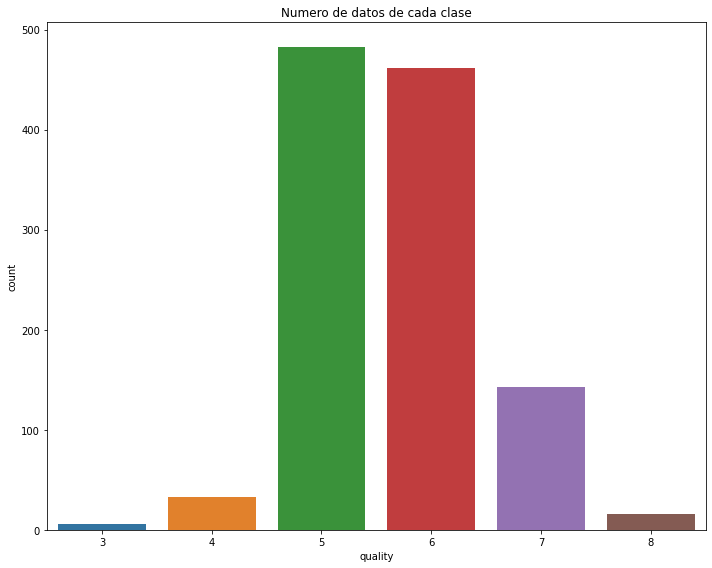

In [173]:
# Limpieza de datos.
# =============================================================

## Definimos un bucle que me diga cuantos datos hay de cada tipo de quality y luego los graficamos.  
quality_list = list(pd.unique(wine_df['quality']))
"""
>>> print(lista) ##Saber que elementos se encuentran en la columna quality sin que se repitan
"""
list_elements = []
for i in quality_list:
    _elements= len(wine_df.loc[wine_df['quality']==i]) 
    list_elements.append(_elements)

x = np.arange(len(list_elements))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x = 'quality',data = wine_df)
plt.title('Numero de datos de cada clase')
plt.tight_layout()
plt.show()


###### ANALISIS DE ESTADISTICO

In [149]:
w = wine_df.drop('quality', axis = 1)
list_columnas = list(w.columns)

for i in list_columnas:
  fig = px.histogram(wine_df,x=i,color=y,title=f'{i} value')
  fig.show()

In [150]:

list1 = wine_df['volatile acidity'].tolist()
quality = wine_df['quality'].tolist()
tamaño = 50*np.array(quality)
fig = px.bar(wine_df, x="quality", y="volatile acidity",barmode="group", title="Acidéz Volatile vs Calidad")
fig.show()


In [151]:
fig = px.pie(wine_df, values='alcohol', names='quality', title='Calidad por grado de Alcohol')
fig.show()

###### ANALISIS DE CORRELACION DE DATOS

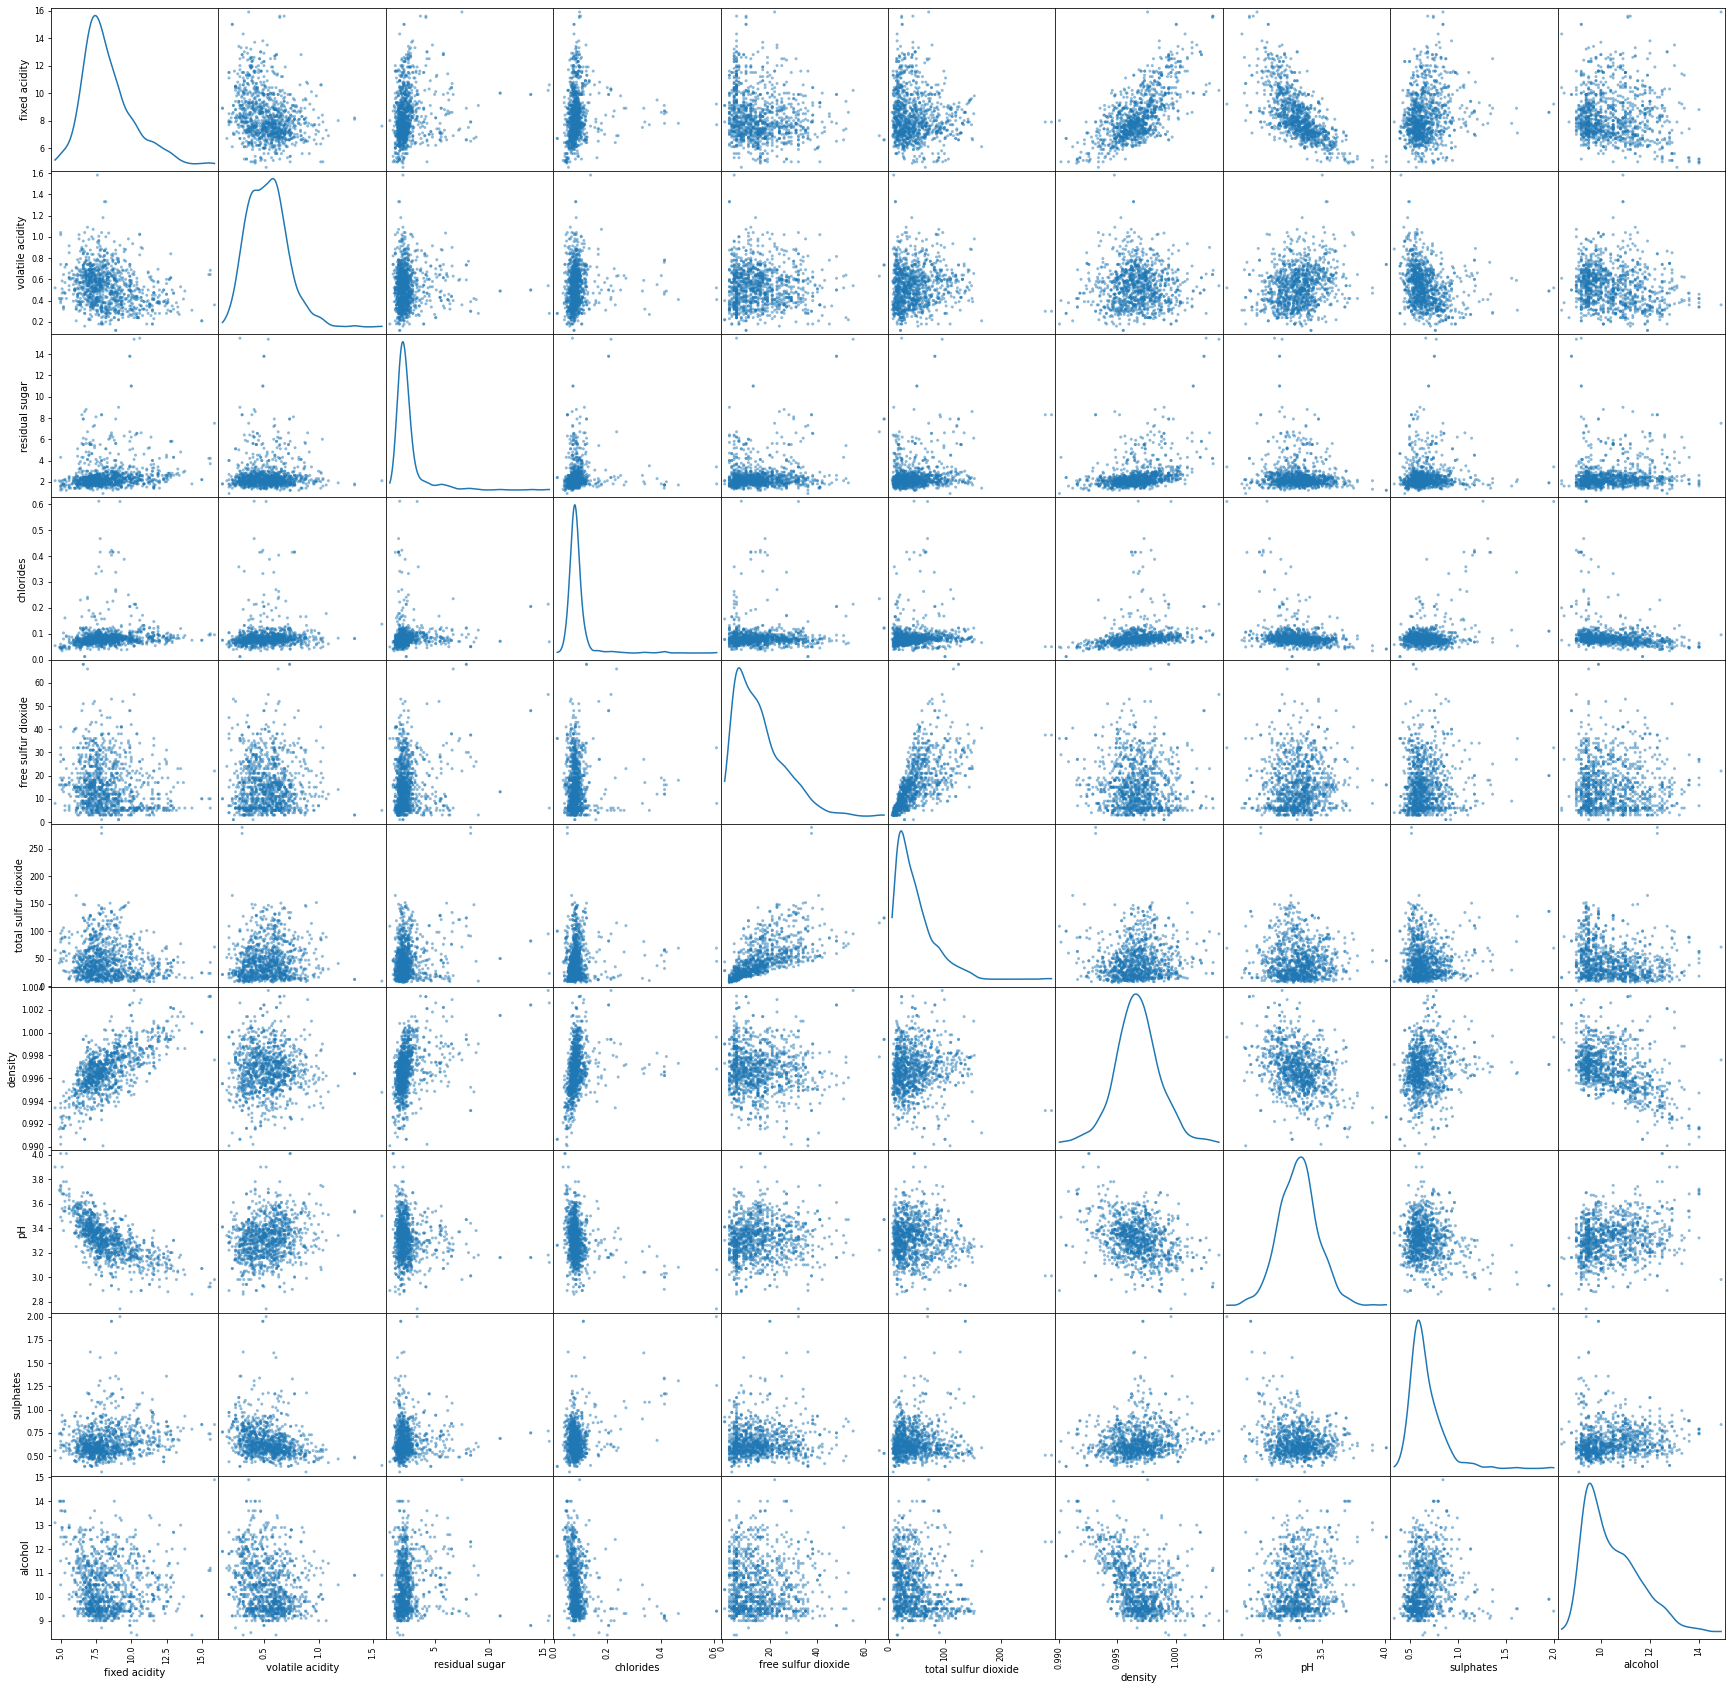

In [152]:
X_data = wine_df.drop('quality', axis = 1)
pd.plotting.scatter_matrix(X_data,figsize = (30,30) , diagonal='kde')
plt.show()

In [153]:
fig = px.scatter_matrix(wine_df, dimensions=["total sulfur dioxide","pH","alcohol"], color="quality",height=800,size="fixed acidity")
fig.show()


###### PREPROCESAMIENTO DE DATOS

<P> En el ANALISIS DE DATOS hemos visto:

1. Los datos de la columna "quality" estan muy desbalanceados. </p>





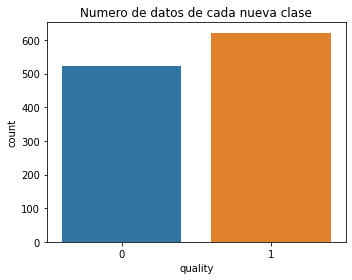

In [174]:
#Balancear los datos.

#Asi que haremos que se separen en 2 clases. [Mala y Buena]
"""
Para eso tengo que establecer parametros. 
Tomare la data desde (3 hasta 5) como un vino malo.
Y la data desde (6,8) como un vino bueno.

Si pudiera dividir las clases en 3 seria mucho mejor, pero como vemos solo hay 2 datos con mucha informacion.
"""

bins = (1,5,10) # Esta tupla se encargara de poner los rangos en que se van a tomar. 
"""
>> bins = (n,m,p) -> [n, m] u < m, p] la data se tomaria asi. 
"""
group_names = ['bad','good'] #Establezco las nuevas clases
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names) 
"""La funcion pd.cut() permite cuando necesite segmentar y ordenar valores de datos en contenedores."""
quality = wine_df

label_quality = LabelEncoder() #Para poder cambiar de str a int.
wine_df['quality'] = label_quality.fit_transform(wine_df['quality'])
wine_df['quality'].value_counts() #Nuestros datos ahora quedan bag = 0 , good = 1.

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x = 'quality',data = quality)
plt.title('Numero de datos de cada nueva clase')
plt.tight_layout()
plt.show()

In [175]:
##Definimos de una vez quienes van a ser nuestro X features & Y target
X = np.array(wine_df.drop('quality', axis = 1))
y = np.array(wine_df['quality'])

<p> 
2. Los "X" features se encuentran algunos datos ≈ 0, estandarizamos y escalamos para poder obtener un mejor modelo. </p>



In [176]:
escaler = StandardScaler()
X = escaler.fit_transform(X)
MaxScaler = MMS()
X = MaxScaler.fit_transform(X)


#### MODELO SIN PCA

##### Optimización de hiperparámetros


<p> Los 4 moldelos que evaluaremos son: 


*   GradientBoostingClassifier
*   LogisticRegression 
*   RandomForestClassifier
*   SVC

Se ha creado una funcion tal que evalue distintos hiperparametros de cada tipo de modelo para poder asi, que hiperparametro es mejor en cada uno.



<p> 
 + Se tuvo un problema con LogistcRegression ya que cabe recalcar el hiperparametro "solver" depende de que"penalty" este establecida.</p>
<img src = "https://raw.githubusercontent.com/Sebas27061234/Python-Intemedio-Trabajo-2022/main/LR.png" width = 200px>

In [157]:
#LogisticRegression estara en un diccionario aparte a lo ya explicado
## ===============================================================================

dict_LR = {'newton-cg' :{'penalty':['l2'],       
                'C': np.linspace(1,50,5),
                'solver':['newton-cg','lbfgs','sag']
                }, 'liblinear':  {'penalty':['l1','l2'],                ########  PARAMETROS DEL LR
                'C': np.linspace(1,100,50),
                'solver':['liblinear']
                }, 'saga' : {'penalty':['l1','l2'],
                'C': np.linspace(1,50,5),
                'solver':['saga']
                }}

dict_modelo = {'RFC': {'n_estimators': np.arange(1,100,1),
                        'max_features': ["auto", 3, 5, 7],               ########  PARAMETROS DEL RFC
                        'max_depth'   : [None, 3, 5,7]
                }, 'SVC' : {'C': np.linspace(1,200,3),
                'kernel': ['linear','poly','rbf','sigmoid'],             ########  PARAMETROS DEL SVC
                'gamma'   : ['scale','auto'],
                'decision_function_shape' : ['ovo','ovr']
                }, 'SGB' :  {'n_estimators': np.arange(1,100,1),
                'loss': ['deviance','exponential'],                      ########  PARAMETROS DEL SGB
                'criterion'   : ['friedman_mse','squared_error'],
                'max_depth'   : [None, 3, 5,7],
                'max_features': ["auto", 3, 5, 7]
                } }

"""
Con el modulo ParameterGrid se puede usar para iterar sobre combinaciones de valores de parámetros
"""
list_Modelo = ['SVC','RFC','SGB','LR']
list_size = [0.1,0.2]
def TestModelo():
        Modelo = input('Ingresa el modelo a analizar: ')
        if Modelo != '' and Modelo != 'LR':
                if Modelo in list_Modelo:
                        for i in list_size:
                          Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                          param_grid = ParameterGrid(dict_modelo[Modelo])  
        elif Modelo != '' and Modelo == 'LR':
                if Modelo in list_Modelo:
                        Solver = input('Inserte solver: ')
                        for i in list_size:
                          Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                          param_grid = ParameterGrid(dict_LR[Solver])
        
        Modelo_m = {'RFC':RFC,'LR':LR,'SGB':SGB,'SVC':SVC}
        resultados = {'params': [], 'scoretest': [],'scoretrain':[],'test_size':[]}
        print('Cargando............')

        for params in param_grid:
                modelo = Modelo_m[Modelo](
                        random_state = 42,
                        ** params
                        )
                
                modelo.fit(Xtrain, ytrain)
                
                resultados['params'].append(params)
                resultados['scoretest'].append(modelo.score(Xtest,ytest))        ### ".score" siver para saber la precision del modelo.
                resultados['scoretrain'].append(modelo.score(Xtrain,ytrain))
                resultados['test_size'].append(i)
                """Para inprimir modelo por modelo 
                >>> print(f"[Modelo: {params}]")
                """
        print('Imprimiendo los resultados')
        resultados = pd.DataFrame(resultados)  #Convertimos los resultados en un data y procedemos a ordenar el score de mayor a menor.
        resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
        resultados = resultados.drop(columns = 'params')
        resultados = resultados.sort_values('scoretest', ascending=False)
        display(resultados.head(10))
        """
        Para ver cuantas iteraciones a tenenido el modelo.
        >>> len(resultados)
        """

###### Analisis del modelo LogisticRegression (LR)

In [158]:
"""
Con solver = [Newton-cg,lbfgs,sag]
"""
LR1 = TestModelo()
LR1

Ingresa el modelo a analizar: LR
Inserte solver: newton-cg
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
0,0.755459,0.753829,0.2,1.00,l2,newton-cg
1,0.755459,0.753829,0.2,1.00,l2,lbfgs
2,0.755459,0.754923,0.2,1.00,l2,sag
3,0.755459,0.760394,0.2,13.25,l2,newton-cg
4,0.755459,0.760394,0.2,13.25,l2,lbfgs
5,0.755459,0.760394,0.2,13.25,l2,sag
6,0.755459,0.760394,0.2,25.50,l2,newton-cg
7,0.755459,0.760394,0.2,25.50,l2,lbfgs
8,0.755459,0.760394,0.2,25.50,l2,sag
9,0.755459,0.760394,0.2,37.75,l2,newton-cg


In [159]:
"""
Con solver = 'liblinear'
"""
LR2 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: liblinear
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
1,0.759825,0.754923,0.2,1.000000,l2,liblinear
5,0.759825,0.763676,0.2,5.040816,l2,liblinear
7,0.759825,0.762582,0.2,7.061224,l2,liblinear
9,0.759825,0.762582,0.2,9.081633,l2,liblinear
11,0.759825,0.761488,0.2,11.102041,l2,liblinear
0,0.755459,0.766958,0.2,1.000000,l1,liblinear
65,0.755459,0.758206,0.2,65.653061,l2,liblinear
74,0.755459,0.759300,0.2,75.755102,l1,liblinear
73,0.755459,0.758206,0.2,73.734694,l2,liblinear
72,0.755459,0.759300,0.2,73.734694,l1,liblinear


In [160]:
"""
Con solver = 'saga'
"""
LR3 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: saga
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
1,0.755459,0.753829,0.2,1.00,l2,saga
2,0.755459,0.759300,0.2,13.25,l1,saga
3,0.755459,0.760394,0.2,13.25,l2,saga
4,0.755459,0.758206,0.2,25.50,l1,saga
5,0.755459,0.760394,0.2,25.50,l2,saga
6,0.755459,0.759300,0.2,37.75,l1,saga
7,0.755459,0.760394,0.2,37.75,l2,saga
8,0.755459,0.759300,0.2,50.00,l1,saga
9,0.755459,0.760394,0.2,50.00,l2,saga
0,0.751092,0.768053,0.2,1.00,l1,saga


###### Analisis del modelo C-Support Vector Classification. (SVC)

In [161]:
SVC = TestModelo()

Ingresa el modelo a analizar: SVC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,decision_function_shape,gamma,kernel
41,0.781659,0.830416,0.2,200.0,ovr,scale,poly
33,0.781659,0.830416,0.2,200.0,ovo,scale,poly
42,0.772926,0.882932,0.2,200.0,ovr,scale,rbf
34,0.772926,0.882932,0.2,200.0,ovo,scale,rbf
2,0.768559,0.787746,0.2,1.0,ovo,scale,rbf
10,0.768559,0.787746,0.2,1.0,ovr,scale,rbf
18,0.764192,0.863239,0.2,100.5,ovo,scale,rbf
17,0.764192,0.823851,0.2,100.5,ovo,scale,poly
26,0.764192,0.863239,0.2,100.5,ovr,scale,rbf
25,0.764192,0.823851,0.2,100.5,ovr,scale,poly


###### Analisis del modelo RandomForestClassifier (RFC)

In [162]:
RFC = TestModelo()

Ingresa el modelo a analizar: RFC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,max_depth,max_features,n_estimators
1495,0.812227,0.917943,0.2,7.0,7,11.0
1098,0.812227,0.838074,0.2,5.0,7,10.0
1099,0.807860,0.840263,0.2,5.0,7,11.0
1496,0.807860,0.917943,0.2,7.0,7,12.0
152,0.803493,1.000000,0.2,NaN,3.0,54.0
1100,0.803493,0.833698,0.2,5.0,7,12.0
53,0.803493,1.000000,0.2,NaN,auto,54.0
316,0.799127,0.996718,0.2,NaN,7.0,20.0
322,0.799127,0.998906,0.2,NaN,7.0,26.0
1498,0.799127,0.923414,0.2,7.0,7,14.0


###### Analisis del modelo GradientBoostingClassifier (SGD)

In [163]:
SGB = TestModelo()

Ingresa el modelo a analizar: SGB
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,criterion,loss,max_depth,max_features,n_estimators
2742,0.80786,0.983589,0.2,friedman_mse,exponential,5.0,7,70
159,0.80786,1.000000,0.2,friedman_mse,deviance,NaN,3,61
3052,0.80786,1.000000,0.2,friedman_mse,exponential,7.0,5,83
3033,0.80786,1.000000,0.2,friedman_mse,exponential,7.0,5,64
3054,0.80786,1.000000,0.2,friedman_mse,exponential,7.0,5,85
3053,0.80786,1.000000,0.2,friedman_mse,exponential,7.0,5,84
5908,0.80786,0.981400,0.2,squared_error,exponential,5.0,7,68
5909,0.80786,0.981400,0.2,squared_error,exponential,5.0,7,69
2740,0.80786,0.981400,0.2,friedman_mse,exponential,5.0,7,68
173,0.80786,1.000000,0.2,friedman_mse,deviance,NaN,3,75


##### MODELOS ELEGIDO 

In [170]:
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.2, random_state = 42)


ModeloSGB = SGB(n_estimators=70,max_depth = 5,max_features=7,loss = 'exponential',criterion ='friedman_mse', random_state=42).fit(Xtrain, ytrain)

ypredtest = ModeloSGB.predict(Xtest)
ypredtrain = ModeloSGB.predict(Xtrain)
scoretrain = ModeloSGB.score(Xtrain, ytrain)
scoretest = ModeloSGB.score(Xtest, ytest)
print(f'El score train es: {round(scoretrain*100,3)}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

El score train es: 98.359%
El score test es: 80.786%
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       102
           1       0.84      0.81      0.82       127

    accuracy                           0.81       229
   macro avg       0.81      0.81      0.81       229
weighted avg       0.81      0.81      0.81       229



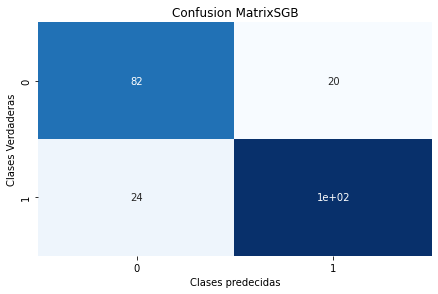

[[ 82  20]
 [ 24 103]]


In [171]:
GrafMatrixConf('SGB')

#### MODELO CON PCA

In [134]:
#Aplicamos PCA.
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
X = pca.transform(X)

fig2 = px.scatter(x=X[:,0], y=X[:,1], color=y, labels={'x':'Componente Principal I','y':'Componente Principal II'})
fig2.show()

##### Optimización de hiperparámetros


<p>

LA FUNCION ES DIFERENTE A LA DE MODELO SIN PCA.  </p>

<p> 
Se ha evaluado las mismos Modelos. Pero la funcion en sus hiperparamentros son diferentes.

 + Se tuvo un problema con LogistcRegression ya que cabe recalcar el hiperparametro "solver" depende de que"penalty" este establecida.</p>
<img src = "https://raw.githubusercontent.com/Sebas27061234/Python-Intemedio-Trabajo-2022/main/LR.png" width = 200px>




In [110]:
dict_LR = {'newton-cg' :{'penalty':['l2'],       
                'C': np.linspace(1,100,20),
                'solver':['newton-cg','lbfgs','sag']
                }, 'liblinear':  {'penalty':['l1','l2'],                ########PARAMETROS DEL LR
                'C': np.linspace(1,100,50),
                'solver':['liblinear']
                }, 'saga' : {'penalty':['l1','l2'],
                'C': np.linspace(1,100,50),
                'solver':['saga']
                }}

dict_modelo = {'RFC': {'n_estimators': np.arange(50,500,50),
                        'max_features': ["auto", 1,2],               ########PARAMETROS DEL RFC
                        'max_depth'   : [None, 3, 5,7]
                }, 'SVC' : {'C': np.linspace(1,100,20),
                'kernel': ['linear','poly','rbf','sigmoid'],             ########PARAMETROS DEL SVC
                'gamma'   : ['scale','auto'],
                'decision_function_shape' : ['ovo','ovr']
                }, 'SGD' :  {'n_estimators': np.arange(1,100,1),
                'loss': ['deviance','exponential'],                      ########PARAMETROS DEL SGD
                'criterion'   : ['friedman_mse','squared_error'],
                'max_depth'   : [None, 3,5,7],
                'max_features': ["auto", 1,2]
                } }

"""
Con el modulo ParameterGrid se puede usar para iterar sobre combinaciones de valores de parámetros
"""
list_size = [0.1,0.2]
list_Modelo = ['SVC','RFC','SGD','LR']
def TestModelo():
        Modelo = input('Ingresa el modelo a analizar: ')
        if Modelo != '' and Modelo != 'LR':
                if Modelo in list_Modelo:
                  for i in list_size:
                        Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                        param_grid = ParameterGrid(dict_modelo[Modelo])  
        elif Modelo != '' and Modelo == 'LR':
                if Modelo in list_Modelo:
                    Solver = input('Inserte solver: ')
                    for i in list_size:
                        Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                        param_grid = ParameterGrid(dict_LR[Solver])
        
        Modelo_m = {'RFC':RFC,'LR':LR,'SGD':SGD,'SVC':SVC}
        resultados = {'params': [], 'scoretest': [],'scoretrain':[],'test_size':[]}
        print('Cargando............')

        for params in param_grid:
                modelo = Modelo_m[Modelo](
                        random_state = 42,
                        ** params
                        )
                
                modelo.fit(Xtrain, ytrain)
                
                resultados['params'].append(params)
                resultados['scoretest'].append(modelo.score(Xtest,ytest))        ### ".score" siver para saber la precision del modelo.
                resultados['scoretrain'].append(modelo.score(Xtrain,ytrain))
                resultados['test_size'].append(i)
                """Para inprimir modelo por modelo 
                >>> print(f"[Modelo: {params}]")
                """
        print('Imprimiendo los resultados')
        resultados = pd.DataFrame(resultados)  #Convertimos los resultados en un data y procedemos a ordenar el score de mayor a menor.
        resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
        resultados = resultados.drop(columns = 'params')
        resultados = resultados.sort_values('scoretest', ascending=False)
        display(resultados.head(10))
        """
        Para ver cuantas iteraciones a tenenido el modelo.
        >>> len(resultados)
        """

###### Analisis del modelo LogisticRegression (LR) +PCA

In [111]:
"""
Con solver = [Newton-cg,lbfgs,sag]
"""
LR1 = TestModelo()
LR1

Ingresa el modelo a analizar: LR
Inserte solver: newton-cg
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
30,0.545852,0.552516,0.2,53.105263,l2,newton-cg
45,0.545852,0.552516,0.2,79.157895,l2,newton-cg
33,0.545852,0.552516,0.2,58.315789,l2,newton-cg
34,0.545852,0.552516,0.2,58.315789,l2,lbfgs
35,0.545852,0.552516,0.2,58.315789,l2,sag
36,0.545852,0.552516,0.2,63.526316,l2,newton-cg
37,0.545852,0.552516,0.2,63.526316,l2,lbfgs
38,0.545852,0.552516,0.2,63.526316,l2,sag
39,0.545852,0.552516,0.2,68.736842,l2,newton-cg
40,0.545852,0.552516,0.2,68.736842,l2,lbfgs


In [112]:
"""
Con solver = 'liblinear'
"""
LR2 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: liblinear
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
0,0.558952,0.557987,0.2,1.000000,l1,liblinear
2,0.558952,0.553611,0.2,3.020408,l1,liblinear
4,0.554585,0.550328,0.2,5.040816,l1,liblinear
6,0.550218,0.551422,0.2,7.061224,l1,liblinear
64,0.545852,0.552516,0.2,65.653061,l1,liblinear
74,0.545852,0.552516,0.2,75.755102,l1,liblinear
73,0.545852,0.552516,0.2,73.734694,l2,liblinear
72,0.545852,0.552516,0.2,73.734694,l1,liblinear
71,0.545852,0.552516,0.2,71.714286,l2,liblinear
70,0.545852,0.552516,0.2,71.714286,l1,liblinear


In [113]:
"""
Con solver = 'saga'
"""
LR3 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: saga
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
2,0.558952,0.551422,0.2,3.020408,l1,saga
0,0.554585,0.551422,0.2,1.000000,l1,saga
4,0.554585,0.550328,0.2,5.040816,l1,saga
6,0.550218,0.551422,0.2,7.061224,l1,saga
64,0.545852,0.552516,0.2,65.653061,l1,saga
74,0.545852,0.552516,0.2,75.755102,l1,saga
73,0.545852,0.552516,0.2,73.734694,l2,saga
72,0.545852,0.552516,0.2,73.734694,l1,saga
71,0.545852,0.552516,0.2,71.714286,l2,saga
70,0.545852,0.552516,0.2,71.714286,l1,saga


###### Analisis del modelo C-Support Vector Classification. (SVC) +PCA

In [114]:
SVC = TestModelo()

Ingresa el modelo a analizar: SVC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,decision_function_shape,gamma,kernel
74,0.681223,0.641138,0.2,21.842105,ovr,scale,rbf
106,0.681223,0.642232,0.2,32.263158,ovr,scale,rbf
66,0.681223,0.641138,0.2,21.842105,ovo,scale,rbf
98,0.681223,0.642232,0.2,32.263158,ovo,scale,rbf
58,0.676856,0.642232,0.2,16.631579,ovr,scale,rbf
122,0.676856,0.642232,0.2,37.473684,ovr,scale,rbf
90,0.676856,0.642232,0.2,27.052632,ovr,scale,rbf
50,0.676856,0.642232,0.2,16.631579,ovo,scale,rbf
114,0.676856,0.642232,0.2,37.473684,ovo,scale,rbf
82,0.676856,0.642232,0.2,27.052632,ovo,scale,rbf


###### Analisis del modelo RandomForestClassifier (RFC) +PCA




In [115]:
RFC = TestModelo()

Ingresa el modelo a analizar: RFC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,max_depth,max_features,n_estimators
106,0.689956,0.841357,0.2,7.0,2,400.0
101,0.689956,0.841357,0.2,7.0,2,150.0
100,0.689956,0.842451,0.2,7.0,2,100.0
105,0.685590,0.840263,0.2,7.0,2,350.0
102,0.685590,0.835886,0.2,7.0,2,200.0
107,0.681223,0.840263,0.2,7.0,2,450.0
104,0.681223,0.844639,0.2,7.0,2,300.0
103,0.681223,0.838074,0.2,7.0,2,250.0
21,0.676856,1.000000,0.2,NaN,2.0,200.0
99,0.676856,0.840263,0.2,7.0,2,50.0


###### Analisis del modelo GradientBoostingClassifier (SGD) +PCA

In [116]:
SGD = TestModelo()

Ingresa el modelo a analizar: SGD
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,criterion,loss,max_depth,max_features,n_estimators
3371,0.711790,0.832604,0.2,squared_error,deviance,7.0,1,6
995,0.711790,0.832604,0.2,friedman_mse,deviance,7.0,1,6
993,0.707424,0.810722,0.2,friedman_mse,deviance,7.0,1,4
3369,0.707424,0.810722,0.2,squared_error,deviance,7.0,1,4
3370,0.703057,0.818381,0.2,squared_error,deviance,7.0,1,5
2186,0.703057,0.839168,0.2,friedman_mse,exponential,7.0,1,9
994,0.703057,0.818381,0.2,friedman_mse,deviance,7.0,1,5
4562,0.703057,0.839168,0.2,squared_error,exponential,7.0,1,9
1917,0.698690,0.804158,0.2,friedman_mse,exponential,5.0,1,37
4294,0.698690,0.804158,0.2,squared_error,exponential,5.0,1,38


##### MODELOS ELEGIDO CON PCA

In [136]:
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.2, random_state = 42)


ModeloSGD = SGB(n_estimators=6,max_depth = 7,max_features=1,loss = 'deviance',criterion ='squared_error', random_state=42).fit(Xtrain, ytrain)

ypredtest = ModeloSGD.predict(Xtest)
ypredtrain = ModeloSGD.predict(Xtrain)
scoretrain = ModeloSGD.score(Xtrain, ytrain)
scoretest = ModeloSGD.score(Xtest, ytest)
print(f'El score train es: {scoretrain*100}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

El score train es: 83.26039387308533%
El score test es: 71.179%
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       102
           1       0.71      0.81      0.76       127

    accuracy                           0.71       229
   macro avg       0.71      0.70      0.70       229
weighted avg       0.71      0.71      0.71       229



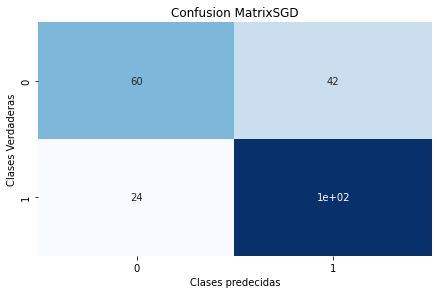

[[ 60  42]
 [ 24 103]]


In [137]:
GrafMatrixConf('SGD')

#### MODELO + K_means + PCA

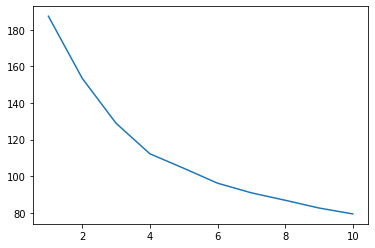

In [177]:
#Visualizar el codo de Jambu
## ==================================================================================
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X)
  inercia.append(k_means.inertia_)

plt.plot(range(1,11),inercia)

In [178]:
# Con el analisis del codo de jambu se puede determinar el K = 5
## ================================================================================

k_means2 = KMeans(n_clusters = 5) 
k_means2.fit(X)
labels = k_means2.labels_

# PCA
## ======================================================================================

pca = PCA(n_components = 2)
pca.fit(X)
X = pca.fit_transform(X)

# Visualizamos los 6 conjuntos
## ======================================================================================

fig2 = px.scatter(x=X[:,0], y=X[:,1], color=labels, labels={'x':'Componente Principal I','y':'Componente Principal II'})
fig2.show()

##### Optimización de hiperparámetros

<p> 
Se ha evaluado las mismos Modelos. Pero la funcion en sus hiperparamentros son diferentes.

 + Se tuvo un problema con LogistcRegression ya que cabe recalcar el hiperparametro "solver" depende de que"penalty" este establecida.</p>
<img src = "https://raw.githubusercontent.com/Sebas27061234/Python-Intemedio-Trabajo-2022/main/LR.png" width = 200px>

In [ ]:
dict_LR = {'newton-cg' :{'penalty':['l2'],       
                'C': np.linspace(1,100,20),
                'solver':['newton-cg','lbfgs','sag']
                }, 'liblinear':  {'penalty':['l1','l2'],                ########PARAMETROS DEL LR
                'C': np.linspace(1,100,50),
                'solver':['liblinear']
                }, 'saga' : {'penalty':['l1','l2'],
                'C': np.linspace(1,100,50),
                'solver':['saga']
                }}

dict_modelo = {'RFC': {'n_estimators': np.arange(50,500,50),
                        'max_features': ["auto", 1,2],               ########PARAMETROS DEL RFC
                        'max_depth'   : [None, 3, 5,7]
                }, 'SVC' : {'C': np.linspace(1,100,20),
                'kernel': ['linear','poly','rbf','sigmoid'],             ########PARAMETROS DEL SVC
                'gamma'   : ['scale','auto'],
                'decision_function_shape' : ['ovo','ovr']
                }, 'SGD' :  {'n_estimators': np.arange(1,100,1),
                'loss': ['deviance','exponential'],                      ########PARAMETROS DEL SGD
                'criterion'   : ['friedman_mse','squared_error'],
                'max_depth'   : [None, 3, 5,7],
                'max_features': ["auto", 1,2]
                } }

"""
Con el modulo ParameterGrid se puede usar para iterar sobre combinaciones de valores de parámetros
"""
list_Modelo = ['SVC','RFC','SGD','LR']
list_size = [0.1,0.2]
def TestModelo():
        Modelo = input('Ingresa el modelo a analizar: ')
        if Modelo != '' and Modelo != 'LR':
                if Modelo in list_Modelo:
                  for i in list_size:
                        Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                        param_grid = ParameterGrid(dict_modelo[Modelo])  
        elif Modelo != '' and Modelo == 'LR':
                if Modelo in list_Modelo:
                        Solver = input('Inserte solver: ')
                        for i in list_size:
                            Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = i, random_state =42)
                            param_grid = ParameterGrid(dict_LR[Solver])
        
        Modelo_m = {'RFC':RFC,'LR':LR,'SGD':SGD,'SVC':SVC}
        resultados = {'params': [], 'scoretest': [],'scoretrain':[],'test_size':[]}
        print('Cargando............')

        for params in param_grid:
                modelo = Modelo_m[Modelo](
                        random_state = 42,
                        ** params
                        )
                
                modelo.fit(Xtrain, ytrain)
                
                resultados['params'].append(params)
                resultados['scoretest'].append(modelo.score(Xtest,ytest))        ### ".score" siver para saber la precision del modelo.
                resultados['scoretrain'].append(modelo.score(Xtrain,ytrain))
                resultados['test_size'].append(i)
                """Para inprimir modelo por modelo 
                >>> print(f"[Modelo: {params}]")
                """
        print('Imprimiendo los resultados')
        resultados = pd.DataFrame(resultados)  #Convertimos los resultados en un data y procedemos a ordenar el score de mayor a menor.
        resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
        resultados = resultados.drop(columns = 'params')
        resultados = resultados.sort_values('scoretest', ascending=False)
        display(resultados.head(10))
        """
        Para ver cuantas iteraciones a tenenido el modelo.
        >>> len(resultados)
        """

###### Analisis del modelo LogisticRegression (LR) +PCA

In [ ]:
"""
Con solver = [Newton-cg,lbfgs,sag]
"""
LR1 = TestModelo()
LR1

Ingresa el modelo a analizar: LR
Inserte solver: newton-cg
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
12,0.694323,0.647702,0.2,21.842105,l2,newton-cg
7,0.694323,0.647702,0.2,11.421053,l2,lbfgs
14,0.694323,0.647702,0.2,21.842105,l2,sag
13,0.694323,0.647702,0.2,21.842105,l2,lbfgs
11,0.694323,0.647702,0.2,16.631579,l2,sag
10,0.694323,0.647702,0.2,16.631579,l2,lbfgs
9,0.694323,0.647702,0.2,16.631579,l2,newton-cg
8,0.694323,0.647702,0.2,11.421053,l2,sag
6,0.694323,0.647702,0.2,11.421053,l2,newton-cg
5,0.694323,0.644420,0.2,6.210526,l2,sag


In [ ]:
"""
Con solver = 'liblinear'
"""
LR2 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: liblinear
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
12,0.694323,0.646608,0.2,13.122449,l1,liblinear
19,0.694323,0.647702,0.2,19.183673,l2,liblinear
17,0.694323,0.647702,0.2,17.163265,l2,liblinear
15,0.694323,0.647702,0.2,15.142857,l2,liblinear
14,0.694323,0.646608,0.2,15.142857,l1,liblinear
13,0.694323,0.647702,0.2,13.122449,l2,liblinear
11,0.694323,0.647702,0.2,11.102041,l2,liblinear
10,0.694323,0.646608,0.2,11.102041,l1,liblinear
9,0.694323,0.645514,0.2,9.081633,l2,liblinear
8,0.694323,0.646608,0.2,9.081633,l1,liblinear


In [ ]:
"""
Con solver = 'saga'
"""
LR3 = TestModelo()

Ingresa el modelo a analizar: LR
Inserte solver: saga
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,penalty,solver
20,0.694323,0.646608,0.2,21.204082,l1,saga
11,0.694323,0.647702,0.2,11.102041,l2,saga
23,0.694323,0.647702,0.2,23.224490,l2,saga
21,0.694323,0.647702,0.2,21.204082,l2,saga
19,0.694323,0.647702,0.2,19.183673,l2,saga
18,0.694323,0.646608,0.2,19.183673,l1,saga
17,0.694323,0.647702,0.2,17.163265,l2,saga
16,0.694323,0.646608,0.2,17.163265,l1,saga
15,0.694323,0.647702,0.2,15.142857,l2,saga
13,0.694323,0.647702,0.2,13.122449,l2,saga


###### Analisis del modelo C-Support Vector Classification. (SVC) +PCA

In [ ]:
SVC = TestModelo()

Ingresa el modelo a analizar: SVC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,C,decision_function_shape,gamma,kernel
230,0.703057,0.660832,0.2,73.947368,ovo,auto,rbf
294,0.703057,0.661926,0.2,94.789474,ovo,auto,rbf
254,0.703057,0.661926,0.2,79.157895,ovr,auto,rbf
238,0.703057,0.660832,0.2,73.947368,ovr,auto,rbf
262,0.703057,0.663020,0.2,84.368421,ovo,auto,rbf
270,0.703057,0.663020,0.2,84.368421,ovr,auto,rbf
278,0.703057,0.663020,0.2,89.578947,ovo,auto,rbf
198,0.703057,0.660832,0.2,63.526316,ovo,auto,rbf
286,0.703057,0.663020,0.2,89.578947,ovr,auto,rbf
222,0.703057,0.660832,0.2,68.736842,ovr,auto,rbf


###### Analisis del modelo RandomForestClassifier (RFC) +PCA

In [ ]:
RFC = TestModelo()

Ingresa el modelo a analizar: RFC
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,max_depth,max_features,n_estimators
0,0.716157,1.0,0.2,NaN,auto,50.0
9,0.716157,1.0,0.2,NaN,1.0,50.0
10,0.711790,1.0,0.2,NaN,1.0,100.0
1,0.711790,1.0,0.2,NaN,auto,100.0
2,0.707424,1.0,0.2,NaN,auto,150.0
11,0.707424,1.0,0.2,NaN,1.0,150.0
25,0.698690,1.0,0.2,NaN,2.0,400.0
3,0.694323,1.0,0.2,NaN,auto,200.0
24,0.694323,1.0,0.2,NaN,2.0,350.0
23,0.694323,1.0,0.2,NaN,2.0,300.0


###### Analisis del modelo GradientBoostingClassifier (SGD) +PCA

In [ ]:
SGD = TestModelo()

Ingresa el modelo a analizar: SGD
Cargando............
Imprimiendo los resultados


,scoretest,scoretrain,test_size,criterion,loss,max_depth,max_features,n_estimators
2510,0.746725,1.0,0.2,squared_error,deviance,NaN,1,36
2513,0.746725,1.0,0.2,squared_error,deviance,NaN,1,39
2506,0.746725,1.0,0.2,squared_error,deviance,NaN,1,32
2511,0.742358,1.0,0.2,squared_error,deviance,NaN,1,37
107,0.742358,1.0,0.2,friedman_mse,deviance,NaN,1,9
2517,0.742358,1.0,0.2,squared_error,deviance,NaN,1,43
2508,0.742358,1.0,0.2,squared_error,deviance,NaN,1,34
2512,0.742358,1.0,0.2,squared_error,deviance,NaN,1,38
104,0.742358,1.0,0.2,friedman_mse,deviance,NaN,1,6
2525,0.742358,1.0,0.2,squared_error,deviance,NaN,1,51


##### MODELOS ELEGIDO CON PCA

In [180]:
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.2, random_state =42)

In [182]:
Modelo_SGD = SGB(n_estimators=36,max_depth = None, max_features=1,loss = 'deviance',criterion ='squared_error', random_state=42).fit(Xtrain, ytrain)
ypredtest = Modelo_SGD.predict(Xtest)
ypredtrain = Modelo_SGD.predict(Xtrain)
scoretrain = Modelo_SGD.score(Xtrain, ytrain)
scoretest = Modelo_SGD.score(Xtest, ytest)
print(f'El score train es: {scoretrain*100}%')
print(f'El score test es: {round(scoretest*100,3)}%')
print(classification_report(ytest, ypredtest))

El score train es: 100.0%
El score test es: 74.672%
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       102
           1       0.75      0.82      0.78       127

    accuracy                           0.75       229
   macro avg       0.75      0.74      0.74       229
weighted avg       0.75      0.75      0.74       229



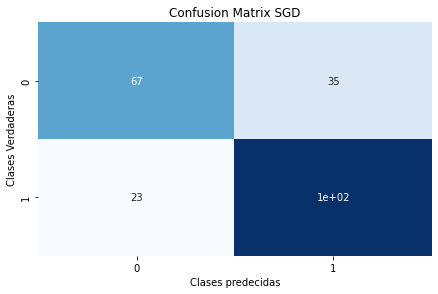

[[ 67  35]
 [ 23 104]]


In [183]:
GrafMatrixConf(' SGD')

#### Biblografia

---


> <p>* González, F. (2015). Machine learning models in rheumatology. Revista Colombiana de Reumatología. http://www.scielo.org.co/pdf/rcre/v22n2/v22n2a01.pdf *</p>

> <p>El modulo ParameterGrid: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html</p>